In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import csv
import os

In [2]:
def select_regions(img):
    img_ = np.zeros(img.shape, dtype=np.uint8)
    img_[:, :, 0] = img[:, :, 2]
    img_[:, :, 1] = img[:, :, 1]
    img_[:, :, 2] = img[:, :, 0]
    
    fromCenter = False
    cv2.namedWindow('Select ROIs', cv2.WINDOW_NORMAL)
    roi = cv2.selectROIs('Select ROIs', img_, fromCenter)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return roi

In [3]:
with open('selection-coordinates.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    csv_writer.writerow(['Image', 'X', 'Y', 'W', 'H'])

In [4]:
current_dir = os.getcwd()
ind = 0
img_list = []
img_path = []
for f in os.listdir(os.path.join(current_dir, 'data')):
    img_list.append(f)
    img_path.append(os.path.join(current_dir, 'data/'+f))

In [5]:
img = Image.open(img_path[0])
img = np.array(img)
roi = select_regions(img)

In [6]:
num_of_selection = roi.shape[0]
selection_list = []
name =img_list[ind].split('.')

with open('selection-coordinates.csv', 'a') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    for i in range(num_of_selection):
        img_name = name[0] + '_' + str(i) + '.' + name[1]
        X, Y, W, H = roi[i]
        selection_list.append(img[Y:Y+H, X:X+W])
        csv_writer.writerow([img_name, X, Y, W, H])

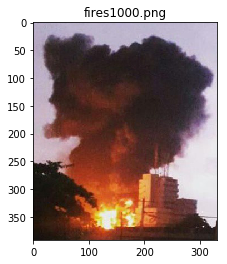

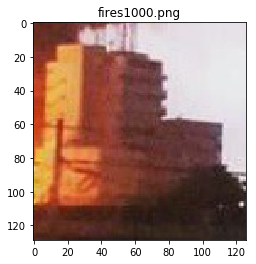

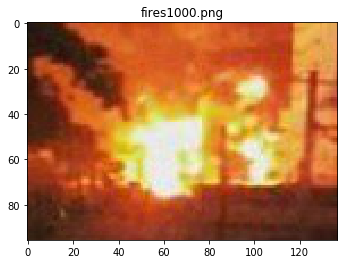

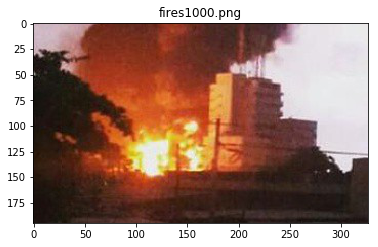

In [7]:
for i in range(num_of_selection):
    plt.imshow(selection_list[i])
    plt.title(img_list[ind])
    plt.show()

## Bounding boxes color

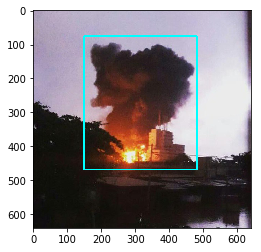

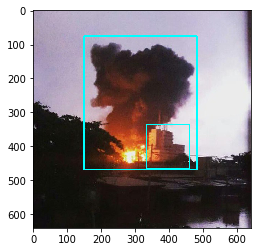

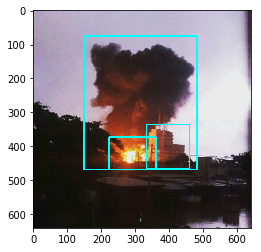

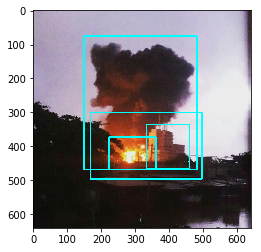

In [8]:
bounding_box = img.copy()

for i in range(num_of_selection):
    X, Y, W, H = roi[i]
    cv2.rectangle(bounding_box, (X, Y), (X+W, Y+H), (0, 255, 255), 3)
    plt.imshow(bounding_box)
    plt.show()